In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF
from PyEMD import EMD
from PyEMD import EEMD

In [56]:
def plot_signals(df, title, n_points, stepsize, n_plots):
    time = list(range(0,n_points, stepsize))
    fig, ax = plt.subplots(n_plots,1)
    fig.suptitle(f'{title}: signals vs time')

    sns.set_style('white')

    for i in range(n_plots):
        ax[i].plot(time,df.iloc[time,i], markersize=3)
        #ax[i].set_ylabel(f'{i+1}-th Comp')


    # plt.figure()
    # plt.scatter(df.iloc[time,0],df.iloc[time,1], linewidths=0.5)
    # plt.title(f'{title}: joint distribution')
    # plt.xlabel('First Comp')
    # plt.ylabel('Second Comp')

In [10]:
signals = pd.read_csv('ex3_signals.txt', delimiter=' ', header=None)

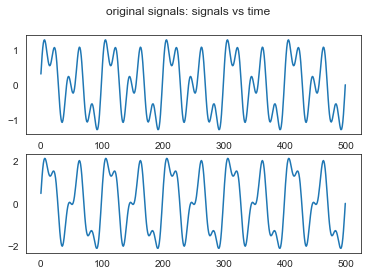

In [58]:
plot_signals(signals, 'original signals', 500, 1, 2)

In [21]:
ica = FastICA(n_components=2, whiten=True)
signalsICATransformed = pd.DataFrame(ica.fit_transform(signals))

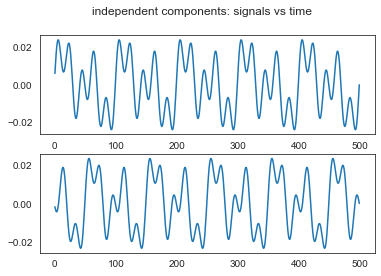

In [59]:
plot_signals(signalsICATransformed, 'independent components', 500, 1, 2)

In [28]:
emd = EMD()
IMFs = emd.emd(np.array(signals[0]))
IMFs.shape

(7, 4999)

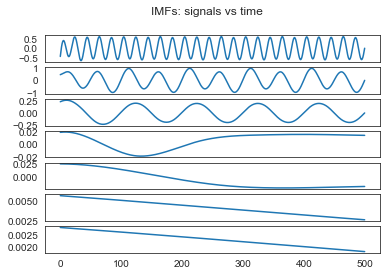

In [60]:
plot_signals(pd.DataFrame(np.transpose(IMFs)), 'IMFs' ,500, 1, 7)

In [61]:
noise = np.random.normal(0, 0.1, 4999)
signalNoisy = np.add(signals[0], noise)

In [68]:
IMFsNoisy = emd.emd(np.array(signalNoisy))
IMFsNoisy.shape[0]

10

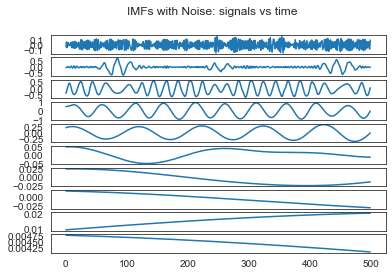

In [70]:
plot_signals(pd.DataFrame(np.transpose(IMFsNoisy)), 'IMFs with Noise' ,500, 1, IMFsNoisy.shape[0])

In [79]:
eemd = EEMD(noise_width = 0.01)
IMFsEnsemble = eemd.eemd(np.array(signalNoisy))
IMFsEnsemble.shape

(11, 4999)

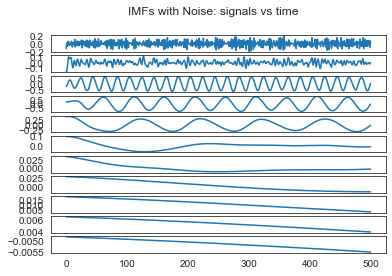

In [76]:
#Plots with default noise 0.05
plot_signals(pd.DataFrame(np.transpose(IMFsEnsemble)), 'IMFs with Noise' ,500, 1, IMFsEnsemble.shape[0])

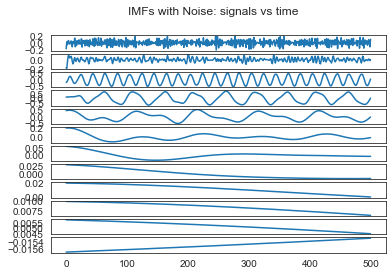

In [78]:
#Plots with noise 0.1
plot_signals(pd.DataFrame(np.transpose(IMFsEnsemble)), 'IMFs with Noise' ,500, 1, IMFsEnsemble.shape[0])

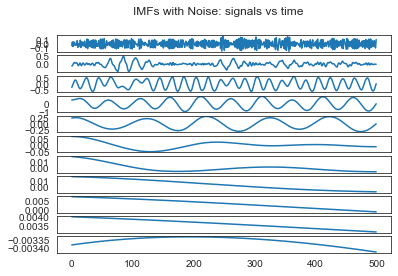

In [80]:
#Plots with noise 0.01
plot_signals(pd.DataFrame(np.transpose(IMFsEnsemble)), 'IMFs with Noise' ,500, 1, IMFsEnsemble.shape[0])